In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


# data = pd.DataFrame({'text': ['This is the first document.',
#                               'This document is the second document.',
#                               'And this is the third one.',
#                               'Is this the first document?']})
data = pd.read_csv('transcripts_clean.csv')
data.head(1)




,Unnamed: 0,number,title,clean_transcript
0,0,01x01,Simpsons Roasting on an Open f*re,ooh careful homer theres no time to be careful...


In [2]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer to the raw text data
tfidf_vectorizer.fit(data['clean_transcript'])

# Transform the raw text into TF-IDF features
tfidf_features = tfidf_vectorizer.transform(data['clean_transcript'])

# Create a DataFrame to store the TF-IDF features
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df)
#Confirmed the weird words are actually part of the corpus via ctrl-f on the transcripts_clean.csv

           00  000  0000  000000  00000000  0001  000to1  001  003  007  ...  \
0    0.006779  0.0   0.0     0.0       0.0   0.0     0.0  0.0  0.0  0.0  ...   
1    0.007851  0.0   0.0     0.0       0.0   0.0     0.0  0.0  0.0  0.0  ...   
2    0.000000  0.0   0.0     0.0       0.0   0.0     0.0  0.0  0.0  0.0  ...   
3    0.000000  0.0   0.0     0.0       0.0   0.0     0.0  0.0  0.0  0.0  ...   
4    0.000000  0.0   0.0     0.0       0.0   0.0     0.0  0.0  0.0  0.0  ...   
..        ...  ...   ...     ...       ...   ...     ...  ...  ...  ...  ...   
570  0.000000  0.0   0.0     0.0       0.0   0.0     0.0  0.0  0.0  0.0  ...   
571  0.000000  0.0   0.0     0.0       0.0   0.0     0.0  0.0  0.0  0.0  ...   
572  0.000000  0.0   0.0     0.0       0.0   0.0     0.0  0.0  0.0  0.0  ...   
573  0.008531  0.0   0.0     0.0       0.0   0.0     0.0  0.0  0.0  0.0  ...   
574  0.000000  0.0   0.0     0.0       0.0   0.0     0.0  0.0  0.0  0.0  ...   

     zydeco   zz  zz99  zzyzwiski  zzzz

In [5]:
#set params for the clustering
max_clusters = 30
min_clusters=4
best_clusters = 0

In [13]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Determine optimal number of clusters using silhouette coefficient
best_score = -1
scoreList = {}
for n_clusters in range(min_clusters, max_clusters+1):
    # Create a KMeans model with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit the KMeans model to the TF-IDF features
    kmeans.fit(tfidf_features)
    
    # Predict the cluster labels for the TF-IDF features
    labels = kmeans.labels_
    
    # Calculate the silhouette score for the clustering result
    score = silhouette_score(tfidf_features, labels)
    scoreList[n_clusters]=score
    # Update the best score and number of clusters if necessary
    if score > best_score:
        best_score = score
        best_clusters = n_clusters

# Print the optimal number of clusters
print("Optimal number of clusters:", best_clusters)

# Perform clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=best_clusters, random_state=42)
kmeans.fit(tfidf_features)

# Get the cluster labels for each document
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
data['cluster'] = cluster_labels

# Display the resulting DataFrame
print(data)
print(scoreList)

/Users/josieber2201/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/josieber2201/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/josieber2201/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/josieber2201/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

Optimal number of clusters: 6


/Users/josieber2201/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


     Unnamed: 0 number                              title  \
0             0  01x01  Simpsons Roasting on an Open f*re   
1             1  01x02                    Bart the Genius   
2             2  01x03                    Homer's Odyssey   
3             3  01x04      There's No Disgrace Like Home   
4             4  01x05                   Bart the General   
..          ...    ...                                ...   
570         570  26x18                        Peeping Mom   
571         571  26x19             The Kids Are All Fight   
572         572  26x20                Let's Go Fly a Coot   
573         573  26x21                             Bull-E   
574         574  26x22                    Mathlete's Feat   

                                      clean_transcript  cluster  
0    ooh careful homer theres no time to be careful...        5  
1    come on mom yeah mom hurry up all right mmm ho...        0  
2    chattering mrs now class i dont want this fiel...        0  
3  

# COMMENT OUT THE KMEANS SSE RUN TO RERUN AND HAVE THE CORRECT CLUSTERING

/Users/josieber2201/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ValueError: x and y must have same first dimension, but have shapes (30,) and (27,)

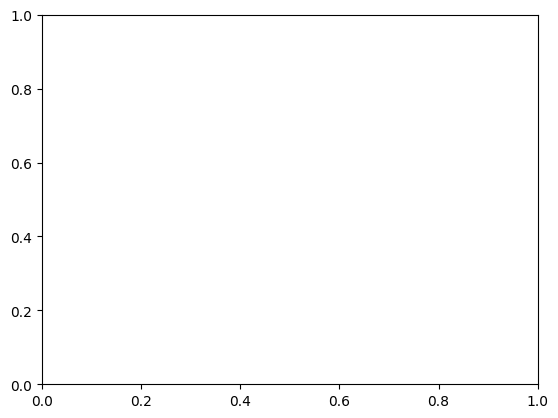

In [6]:

import matplotlib.pyplot as plt
# Perform K-means clustering with varying number of clusters

sse = []  # List to store the sum of squared errors

for n_clusters in range(min_clusters, max_clusters+1):
    # Create a KMeans model with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit the KMeans model to the TF-IDF features
    kmeans.fit(tfidf_features)
    
    # Append the sum of squared errors to the list
    sse.append(kmeans.inertia_)


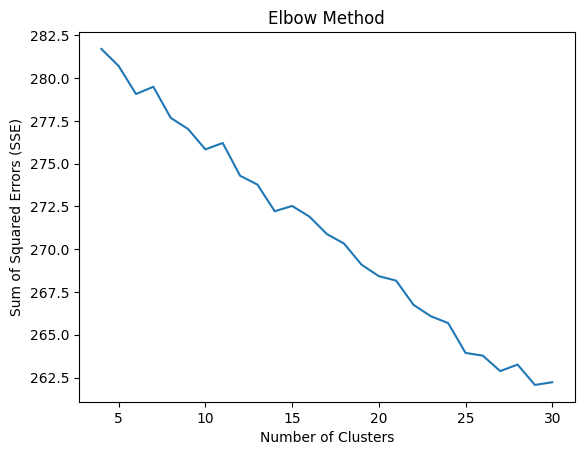

In [7]:
# Plot the SSE values against the number of clusters
plt.plot(range(min_clusters, max_clusters+1), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()

In [14]:
experimentalText =  pd.DataFrame({'text': ['This is the first document.']})

In [18]:
experimental_features = tfidf_vectorizer.transform(experimentalText['text'])
experimental_idf = pd.DataFrame(experimental_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [21]:
kmeans.transform(experimental_features)

array([[1.16496246, 1.15474841, 1.14827127, 1.17119616, 1.15778096,
        1.13865579]])

In [ ]:
import re
#preprocess input document
document = "This is the first document"
pattern2 = r"[^\w\s]"
document_processed = " ".join(document.strip().lower().replace('\n', ' ').split())
document_processed = re.sub(pattern2, "", document_processed)

In [23]:

# Transform the input document into TF-IDF features
input_tfidf = tfidf_vectorizer.transform([document_processed])

# Predict the cluster label for the input document
predicted_cluster = kmeans.predict(input_tfidf)[0]

print("Predicted Cluster:", predicted_cluster)


Predicted Cluster: 5


In [28]:
tfidf_df['cluster']=cluster_labels

In [39]:
matchingClusters = tfidf_df[tfidf_df['cluster']==predicted_cluster]

In [30]:
matchingClusters

,00,000,0000,000000,00000000,0001,000to1,001,003,007,...,zydeco,zz,zz99,zzyzwiski,zzzzzzzzzzzzzzzzzz,ándale,çalm,éclair,êtes,ﬂght
0,0.006779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
561,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
562,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
568,0.022481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity between the input document and the TF-IDF DataFrame
#input data first ,og data next
matchingClusters['cosine_similarity'] = cosine_similarity(input_tfidf, matchingClusters)[0]

/var/folders/hm/7_f2zj854wg_2q1sqshlqw3h0000gp/T/ipykernel_11192/2970010851.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchingClusters['cosine_similarity'] = cosine_similarity(input_tfidf, matchingClusters)[0]


In [41]:
matchingClusters = matchingClusters.reset_index().rename(columns={'level_0': 'documentNum'})

In [43]:
matchingClusters = matchingClusters.rename(columns={'level_0':'documentNum'})

In [45]:
matchingClusters = matchingClusters.sort_values(by='cosine_similarity', ascending=False)


In [46]:
matchingClusters

,documentNum,00,000,0000,000000,00000000,0001,000to1,001,003,...,zz,zz99,zzyzwiski,zzzzzzzzzzzzzzzzzz,ándale,çalm,éclair,êtes,ﬂght,cosine_similarity
100,440,0.003293,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026544
122,514,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025407
4,7,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.024055
10,18,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023853
124,518,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,362,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015266
36,129,0.008087,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015011
121,507,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014408
61,261,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013433


In [48]:
topTenResults = matchingClusters.head(10)

In [50]:
topTenResults

,documentNum,00,000,0000,000000,00000000,0001,000to1,001,003,...,zz,zz99,zzyzwiski,zzzzzzzzzzzzzzzzzz,ándale,çalm,éclair,êtes,ﬂght,cosine_similarity
100,440,0.003293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026544
122,514,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025407
4,7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.024055
10,18,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023853
124,518,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023392
3,6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022934
24,95,0.008617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022910
117,491,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022815
82,342,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022737
41,162,0.006089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022733


In [58]:
import pickle
# Serialize and save the model
with open('flask/tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

with open('flask/kmeans.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

with open('flask/documents_idf.pkl','wb') as file:
    pickle.dump(tfidf_df,file)

with open('flask/documents.pkl','wb') as file:
    pickle.dump(data[['number','title']],file)



In [59]:
tfidf_df

,00,000,0000,000000,00000000,0001,000to1,001,003,007,...,zydeco,zz,zz99,zzyzwiski,zzzzzzzzzzzzzzzzzz,ándale,çalm,éclair,êtes,ﬂght
0,0.006779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.007851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
571,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
572,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
573,0.008531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
#Testing application logic

with open('flask/pkls/tfidf_vectorizer.pkl', 'rb') as file:
        tfidf_vectorizer = pickle.load(file)


with open('flask/pkls/kmeans.pkl', 'rb') as file:
         kmeans =  pickle.load(file)
         
with open('flask/pkls/documents.pkl', 'rb') as file:
         documents =  pickle.load(file)
documents = documents.reset_index().rename(columns={'level_0': 'documentNum'})

with open('flask/pkls/documents_idf.pkl', 'rb') as file:
         tfidf_df =  pickle.load(file)


In [70]:
import re
document = 'bananas are cool'
pattern2 = r"[^\w\s]"
document_processed = " ".join(document.strip().lower().replace('\n', ' ').split())
document_processed = re.sub(pattern2, "", document_processed)
input_tfidf = tfidf_vectorizer.transform([document_processed])
predicted_cluster = kmeans.predict(input_tfidf)[0]
matchingClusters = tfidf_df[tfidf_df['cluster']==predicted_cluster]
matchingClusters['cosine_similarity'] = cosine_similarity(input_tfidf, matchingClusters)[0]

matchingClusters = matchingClusters.reset_index().rename(columns={'level_0': 'documentNum'})
matchingClusters = matchingClusters.sort_values(by='cosine_similarity', ascending=False)
topTenResults = matchingClusters.head(10)
print(topTenResults)
print(documents)
topTenResults = topTenResults[['documentNum','cosine_similarity']]
resultsReturner = pd.merge(topTenResults, documents, left_on='documentNum', right_on = 'index', how='inner')
resultsJson = resultsReturner.to_json(orient='records')

   documentNum   00  000  0000  000000  00000000  0001  000to1  001  003  ...  \
0           70  0.0  0.0   0.0     0.0       0.0   0.0     0.0  0.0  0.0  ...   
1          188  0.0  0.0   0.0     0.0       0.0   0.0     0.0  0.0  0.0  ...   
2          508  0.0  0.0   0.0     0.0       0.0   0.0     0.0  0.0  0.0  ...   

    zz  zz99  zzyzwiski  zzzzzzzzzzzzzzzzzz  ándale  çalm  éclair  êtes  ﬂght  \
0  0.0   0.0        0.0                 0.0     0.0   0.0     0.0   0.0   0.0   
1  0.0   0.0        0.0                 0.0     0.0   0.0     0.0   0.0   0.0   
2  0.0   0.0        0.0                 0.0     0.0   0.0     0.0   0.0   0.0   

   cosine_similarity  
0           0.003674  
1           0.001154  
2           0.000000  

[3 rows x 45669 columns]
     index number                              title
0        0  01x01  Simpsons Roasting on an Open f*re
1        1  01x02                    Bart the Genius
2        2  01x03                    Homer's Odyssey
3        3  01x04   

/var/folders/hm/7_f2zj854wg_2q1sqshlqw3h0000gp/T/ipykernel_11192/373018141.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchingClusters['cosine_similarity'] = cosine_similarity(input_tfidf, matchingClusters)[0]


In [71]:
print(resultsJson)

[{"documentNum":70,"cosine_similarity":0.0036740071,"index":70,"number":"04x12","title":"Marge vs. the Monorail"},{"documentNum":188,"cosine_similarity":0.0011539786,"index":188,"number":"09x11","title":"All Singing, All Dancing"},{"documentNum":508,"cosine_similarity":0.0,"index":508,"number":"24x00","title":"Maggie Simpson in The Longest Daycare"}]
